<a href="https://colab.research.google.com/github/ImranNust/MISCELLANEOUS/blob/main/LogisticRegression_SimpleExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Importing Necessary Packages
---


In [38]:
import numpy as np
import matplotlib.pyplot as plt

 ---
# 1. Define Helper Functions
 ---

In [39]:
def sigmoid(z):
    """
    Compute the sigmoid activation function.

    Parameters:
        z (np.array): Input values (linear combination of features and weights).

    Returns:
        np.array: Output probabilities after applying the sigmoid function.
    """
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    """
    Compute binary cross-entropy loss.

    Parameters:
        y_true (np.array): Ground truth labels (0 or 1).
        y_pred (np.array): Predicted probabilities.

    Returns:
        float: Mean binary cross-entropy loss.
    """
    epsilon = 1e-8  # To avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


def plot_decision_boundary(w1, w2, b, title, filename):
    """
    Visualize the decision boundary for logistic regression.
    """
    xx, yy = np.meshgrid(np.linspace(-0.1, 1.1, 100), np.linspace(-0.1, 1.1, 100))
    zz = sigmoid(w1 * xx + w2 * yy + b)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, zz, levels=[0, 0.5, 1], colors=['#ADD8E6', '#FFA07A'], alpha=0.5)

    # Plot the original data points
    plt.scatter(x1[y==0], x2[y==0], color='blue', label="Class 0 (No Access)",
                s=150, edgecolors='black', linewidth=1.5)
    plt.scatter(x1[y==1], x2[y==1], color='red', label="Class 1 (Access Granted)",
                s=150, edgecolors='black', linewidth=1.5)

    # Decision boundary line (where sigmoid = 0.5)
    plt.contour(xx, yy, zz, levels=[0.5], colors='black', linestyles='dashed', linewidths=2)

    # Aesthetic enhancements
    plt.grid(True, which='major', linestyle='-', linewidth=0.7, color='gray')
    plt.grid(True, which='minor', linestyle='--', linewidth=0.5, color='lightgray')
    plt.xticks(fontsize=12, fontweight='bold', color='black')
    plt.yticks(fontsize=12, fontweight='bold', color='black')
    plt.xlabel("x1", fontsize=12, fontweight='bold', color='black')
    plt.ylabel("x2", fontsize=12, fontweight='bold', color='black')
    plt.title(title, fontsize=14, fontweight='bold', color='black')
    plt.legend()
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

---
# 2. Input Data: Biometric and Password-Based Security System
---

In [40]:
import pandas as pd

# Input arrays
x1 = np.array([0, 1, 0, 1])
x2 = np.array([0, 0, 1, 1])
y = np.array([0, 0, 0, 1])

# Create DataFrame
df = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y (AND Output)': y
})

# Print as a string without index
df

,x1,x2,y (AND Output)
0,0,0,0
1,1,0,0
2,0,1,0
3,1,1,1


---
# 3. Initialize Model Parameters
---

In [41]:
# Initial weights and bias
w1, w2, b = 1.5, 0.5, -1
alpha = 1.2  # Learning rate

---
# 4. Forward Pass: Compute Predictions
---

In [42]:
z = w1 * x1 + w2 * x2 + b  # Linear combination
y_pred = sigmoid(z)        # Apply sigmoid activation
loss = binary_cross_entropy(y, y_pred)

print("Initial Linear Output (z):", z)
print("Initial Predictions (sigmoid(z)):", y_pred)
print("Initial Loss (BCE):", loss)

Initial Linear Output (z): [-1.   0.5 -0.5  1. ]
Initial Predictions (sigmoid(z)): [0.26894142 0.62245933 0.37754067 0.73105858]
Initial Loss (BCE): 0.5186693358491647


---
# 5. Visualize Decision Boundary
---

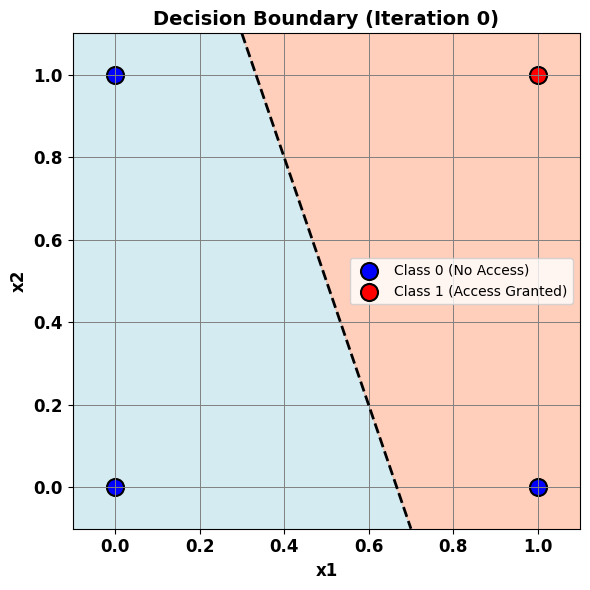

In [43]:
# Plot with initial parameters
plot_decision_boundary(w1, w2, b, "Decision Boundary (Iteration 0)", "decision_boundary_for_iteration0.png")

---
# 7. Compute Gradients
---

In [44]:
# Derivatives of the loss with respect to each parameter
dw1 = np.mean((y_pred - y) * x1)
dw2 = np.mean((y_pred - y) * x2)
db = np.mean(y_pred - y)

print("\nGradients:")
print(f"dw1: {dw1:.4f}, dw2: {dw2:.4f}, db: {db:.4f}")

# Update weights and bias using gradient descent
w1 -= alpha * dw1
w2 -= alpha * dw2
b -= alpha * db

print("\nUpdated Parameters After Gradient Descent:")
print(f"w1: {w1:.2f}, w2: {w2:.2f}, b: {b:.2f}")


Gradients:
dw1: 0.0884, dw2: 0.0271, db: 0.2500

Updated Parameters After Gradient Descent:
w1: 1.39, w2: 0.47, b: -1.30


---
# 8. Visualize After Another Update
---


After First Update:
z: [-1.3   0.09 -0.83  0.56]
Predictions: [0.21416502 0.52248482 0.30364507 0.63645254]
Loss: 0.4484772530477216


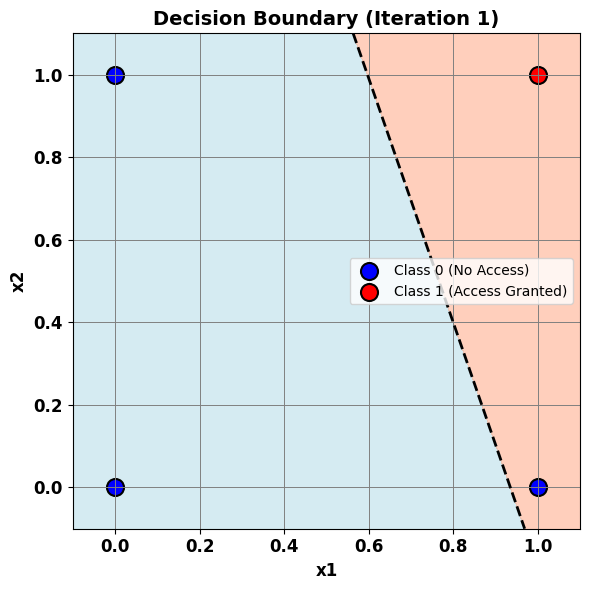

In [45]:
# Updated weights and bias (e.g., after one gradient descent step)
w1, w2, b = 1.39, 0.47, -1.3
z = w1 * x1 + w2 * x2 + b
y_pred = sigmoid(z)
loss = binary_cross_entropy(y, y_pred)

print("\nAfter First Update:")
print("z:", z)
print("Predictions:", y_pred)
print("Loss:", loss)

plot_decision_boundary(w1, w2, b, "Decision Boundary (Iteration 1)", "decision_boundary_for_iteration1.png")

---
# 7. Compute Gradients
---

In [46]:
# Derivatives of the loss with respect to each parameter
dw1 = np.mean((y_pred - y) * x1)
dw2 = np.mean((y_pred - y) * x2)
db = np.mean(y_pred - y)

print("\nGradients:")
print(f"dw1: {dw1:.4f}, dw2: {dw2:.4f}, db: {db:.4f}")

# Update weights and bias using gradient descent
w1 -= alpha * dw1
w2 -= alpha * dw2
b -= alpha * db

print("\nUpdated Parameters After Gradient Descent:")
print(f"w1: {w1:.2f}, w2: {w2:.2f}, b: {b:.2f}")


Gradients:
dw1: 0.0397, dw2: -0.0150, db: 0.1692

Updated Parameters After Gradient Descent:
w1: 1.34, w2: 0.49, b: -1.50


---
# 8. Visualize After Another Update
---


After Second Manual Update:
z: [-1.5  -0.16 -1.01  0.33]
Predictions: [0.18242552 0.46008512 0.26697985 0.58175938]
Loss: 0.41750937459024107


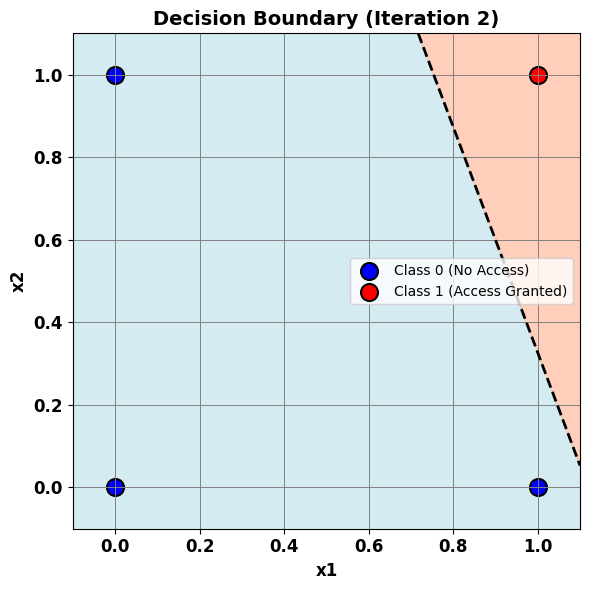

In [47]:
# Manual second update to demonstrate boundary change
w1, w2, b = 1.34, 0.49, -1.5
z = w1 * x1 + w2 * x2 + b
y_pred = sigmoid(z)
loss = binary_cross_entropy(y, y_pred)

print("\nAfter Second Manual Update:")
print("z:", z)
print("Predictions:", y_pred)
print("Loss:", loss)

plot_decision_boundary(w1, w2, b, "Decision Boundary (Iteration 2)", "decision_boundary_for_iteration2.png")